<a href="https://colab.research.google.com/github/Aayush2799/Prodigy_P3/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MountDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Prodigy

/content/drive/MyDrive/Prodigy


Importing Necessary Libraries.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




Loading the Data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Prodigy/P3/bank-additional-full.csv', delimiter=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# **Data** **Preprocessing**

First we will encode categorical variables ensure y column in the dataset and drop it

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
  label_encoders[column] = LabelEncoder()
  df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
if 'y' in df.columns:
    X = df.drop(columns=['y'])
    y = df['y']
else:
    raise ValueError("'y' column not found in the dataset.")


### **Then we will perform feature scaling for Clustering.**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['y']))

### After this we will apply KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now we will Visualize Customer Segmentation with 3 different scatterplots:

Age vs. Employment Variation Date.

Employment Variation Date vs. Consumer Confidence Index.

Age vs. Number of Employees.


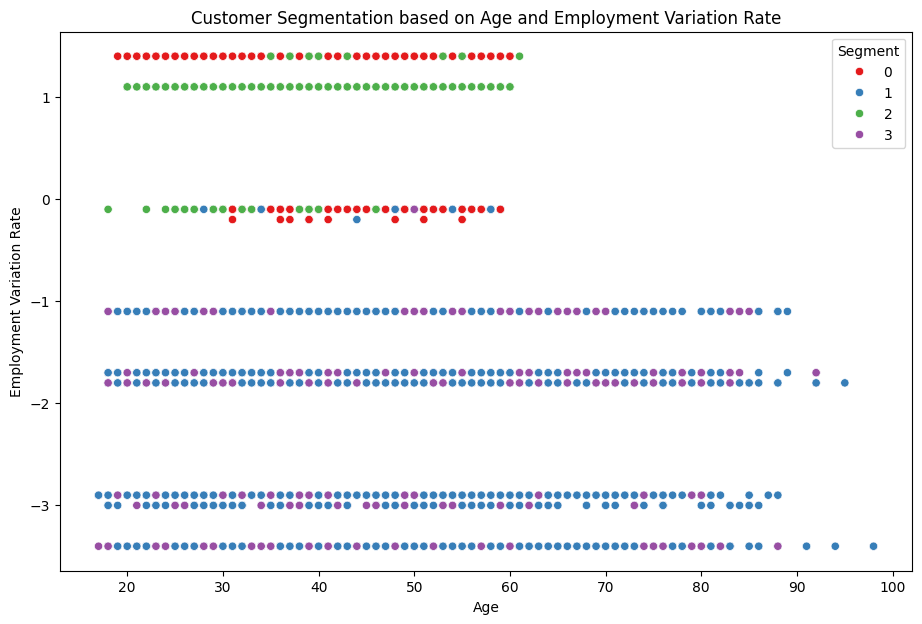

In [ ]:
plt.figure(figsize = (11,7))
sns.scatterplot(x=df['age'], y=df['emp.var.rate'], hue=df['Segment'], palette='Set1')
plt.title('Customer Segmentation based on Age and Employment Variation Rate')
plt.xlabel('Age')
plt.ylabel('Employment Variation Rate')
plt.show()

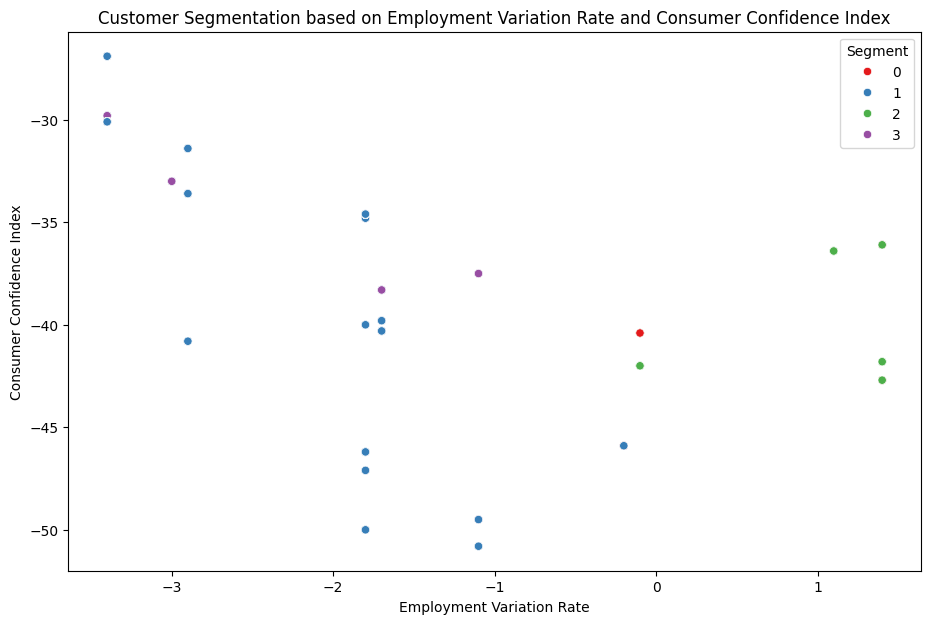

In [ ]:
plt.figure(figsize = (11,7))
sns.scatterplot(x=df['emp.var.rate'], y=df['cons.conf.idx'], hue=df['Segment'], palette='Set1')
plt.title('Customer Segmentation based on Employment Variation Rate and Consumer Confidence Index')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Consumer Confidence Index')
plt.show()

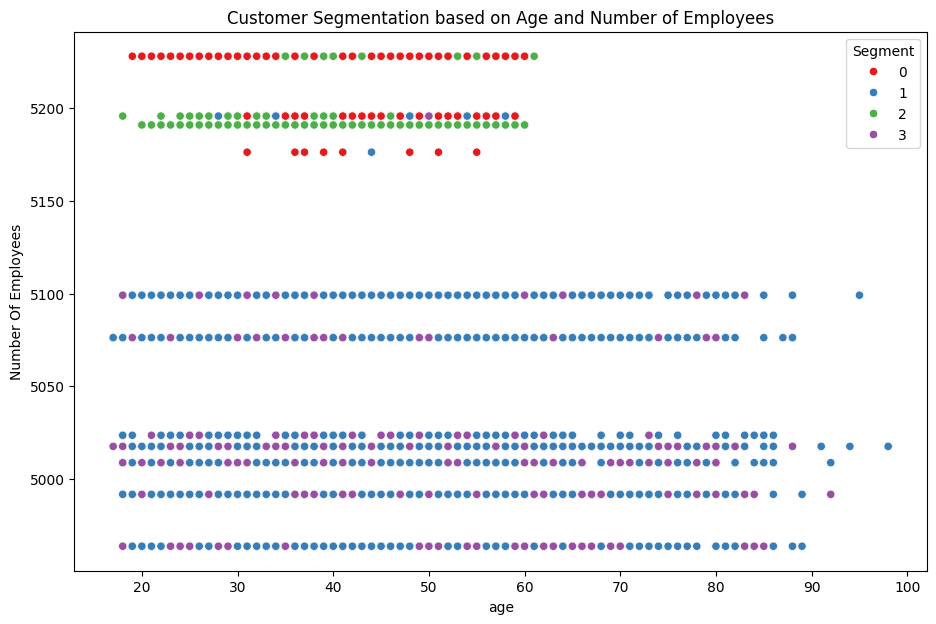

In [ ]:
plt.figure(figsize = (11,7))
sns.scatterplot(x=df['age'], y=df['nr.employed'], hue=df['Segment'], palette='Set1')
plt.title('Customer Segmentation based on Age and Number of Employees')
plt.xlabel('age')
plt.ylabel('Number Of Employees')
plt.show()

Now, we will split the data in Training and Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Now, we will train Decision Tree Classifier and Evaluate the Model

In [ ]:
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8894149065307113
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
 [[6846  457]
 [ 454  481]]
